In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

/Users/pokutnik/anaconda3/envs/ekans/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
%matplotlib inline

In [3]:
btc = pd.read_csv('../bitcoin-daily-bars/bitcoin-daily-prices-incl-indicators.csv')
btc.sample(10)

,Date,Open,High,Low,Close,Volume,$Turnover,Volatility
1669,2014-12-18,321.8000,1200.48000,280.0000,312.8900,94145.0,6.968989e+07,920.48000
476,2011-09-12,5.9400,9.32000,3.8002,6.0780,71010.5,4.658360e+05,5.51980
1877,2015-07-14,291.3100,1000.00000,233.2600,286.8600,64376.8,3.969667e+07,766.74000
1369,2014-02-21,542.6850,2000.00000,91.5000,111.4000,169002.0,1.767338e+08,1908.50000
2304,2016-09-13,606.8500,3676.47000,486.4400,608.6300,50231.6,1.045548e+08,3190.03000
1647,2014-11-26,410.2000,13333.30000,242.8600,364.3870,46086.4,3.128382e+08,13090.44000
151,2010-10-22,0.1015,0.10901,0.0881,0.1025,41303.9,4.070706e+03,0.02091
2224,2016-06-25,665.8600,3278.69000,580.3400,878.4800,84272.5,1.626051e+08,2698.35000
1640,2014-11-19,377.6300,1500.00000,335.8200,381.6100,42453.0,3.896803e+07,1164.18000
1211,2013-09-16,125.3600,198.64000,118.8500,139.4190,24980.4,3.965514e+06,79.79000


In [4]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc = btc.set_index('Date')

In [14]:
ind = pd.DataFrame(index=btc.index)
ind['pd_T0'] = btc.Close - btc.Open
ind['rpd_T0'] = ind['pd_T0'] / btc.Open
ind['v_T0'] = btc.Volume
ind['hl_T0'] = btc.High - btc.Low
ind['s_T0'] = btc['$Turnover']

btc_T1 = btc.shift(-1)
ind['pd_T1'] = btc_T1.Close - btc.Open
ind['rpd_T1'] = ind['pd_T1'] / btc.Open
ind['dv_T1'] = btc_T1.Volume - btc.Volume
ind['v_T1'] = btc_T1.Volume
ind['hl_T1'] = btc_T1.High - btc.Low
ind['s_T1'] = btc_T1['$Turnover']

btc_T2 = btc.shift(-2)
ind['pd_T2'] = btc_T2.Close - btc.Open
ind['rpd_T1'] = ind['pd_T2'] / btc.Open
ind['v_T2'] = btc_T2.Volume
ind['s_T2'] = btc_T2['$Turnover']

btc_M3 = btc.rolling(window=3).mean()
ind['dh_m3'] = btc.High - btc_M3.High
ind['dl_m3'] = btc.Low - btc_M3.Low
ind['do_m3'] = btc.Open - btc_M3.Close
ind['dp_m3'] = (btc.High-btc.Low)/2 - (btc_M3.High - btc_M3.Low)/2


ind.dropna(inplace=True)

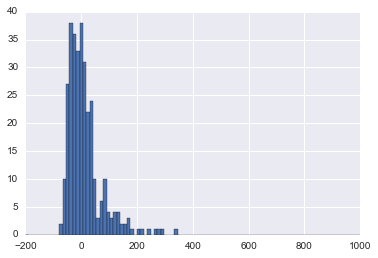

In [29]:
# market fluctuations
i = ind.ix['2016-06-01':]
(i.dv_T1 / i.v_T0 * 100).hist(bins=np.linspace(-200, 1000, 100))

In [32]:
volume_jump = (i.dv_T1 / i.v_T0 * 100) > 100
volume_jump[volume_jump]


Date
2016-06-02    True
2016-06-11    True
2016-06-15    True
2016-06-20    True
2016-07-06    True
2016-07-16    True
2016-07-30    True
2016-08-09    True
2016-09-02    True
2016-09-25    True
2016-10-10    True
2016-10-16    True
2016-11-02    True
2016-12-04    True
2016-12-11    True
2017-01-03    True
2017-01-10    True
2017-01-16    True
2017-01-29    True
2017-01-30    True
2017-02-08    True
2017-02-20    True
2017-03-06    True
2017-03-09    True
2017-03-15    True
2017-03-23    True
dtype: bool

In [6]:
#apply log and cube root transform
col_names = lambda x: x[x].index
log_columns = col_names(ind.min() > 0)
cbrt_columns = col_names(ind.min() <= 0)

for c in log_columns:
    ind['log_'+c] = ind[c].apply(np.log1p)
for c in cbrt_columns:
    ind['cbrt_'+c] = ind[c].apply(np.cbrt)

In [7]:
# drop corelated
corr = ind.corr()
related = np.abs(corr) > 0.8
np.fill_diagonal(related.values, False)
related *= np.tri(*related.shape)
for c in col_names(related.max() > 0):
    del ind[c]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113ec0fd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x117da2710>], dtype=object)

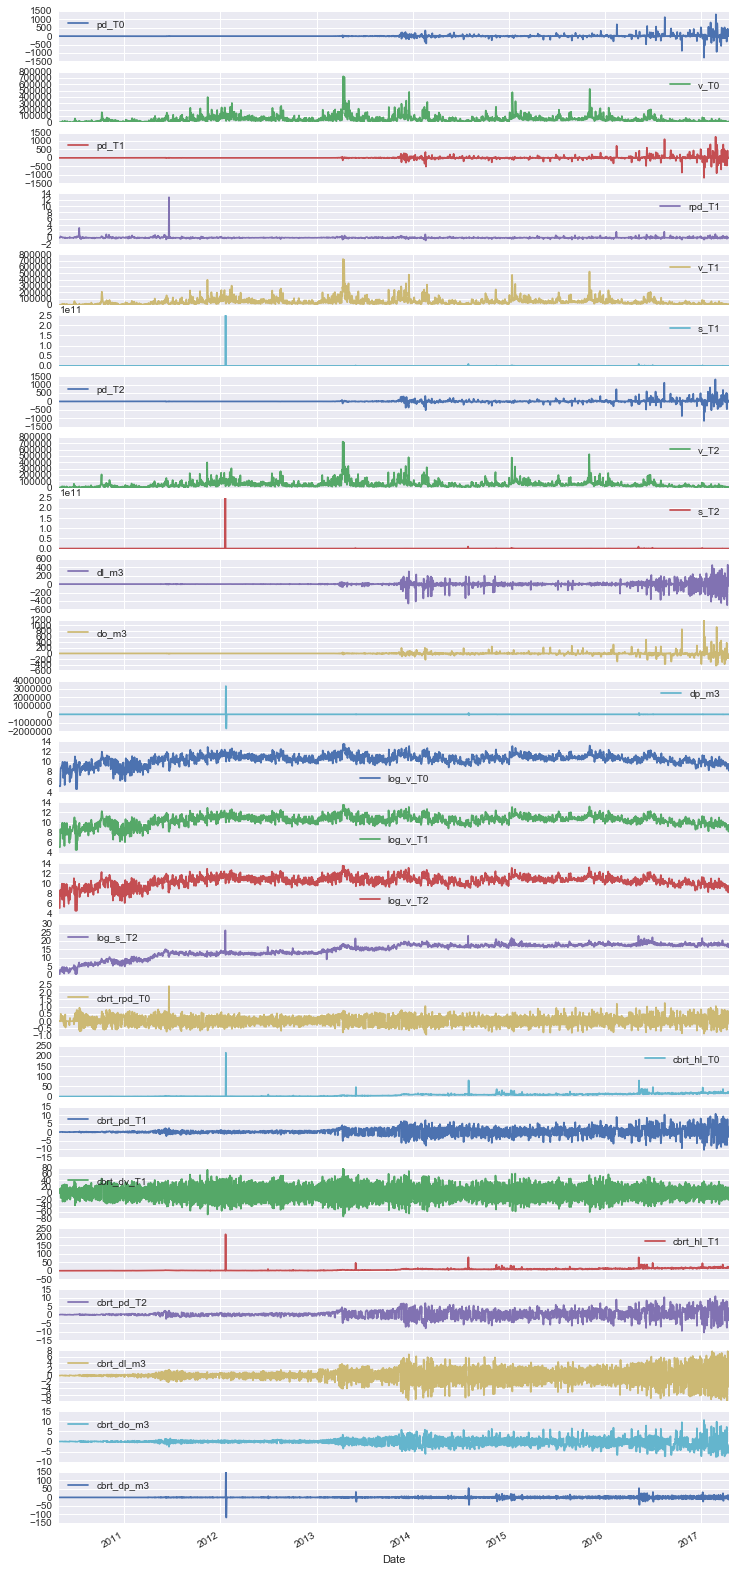

In [8]:
ind.plot(subplots=True, figsize=(12, 30))


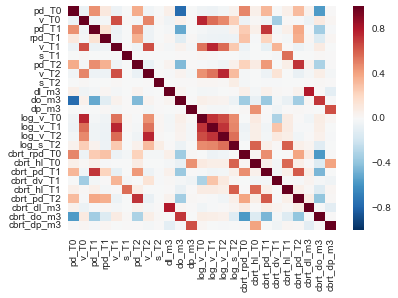

In [9]:
sns.heatmap(ind.corr())

In [10]:
export = ind.copy()
export.columns = ['BTC_'+c for c in export.columns]
export.to_csv('../notebooks/btc-ind.csv')

In [52]:
volume_jump[volume_jump]

Date
2016-06-02    True
2016-06-11    True
2016-06-15    True
2016-06-20    True
2016-07-06    True
2016-07-16    True
2016-07-30    True
2016-08-09    True
2016-09-02    True
2016-09-25    True
2016-10-10    True
2016-10-16    True
2016-11-02    True
2016-12-04    True
2016-12-11    True
2017-01-03    True
2017-01-10    True
2017-01-16    True
2017-01-29    True
2017-01-30    True
2017-02-08    True
2017-02-20    True
2017-03-06    True
2017-03-09    True
2017-03-15    True
2017-03-23    True
dtype: bool